# Adjusting appearance

[https://twitter.com/CedScherer/status/1569945852625526785?s=20&t=ym3pghtVn08doctrnCtv_A](https://twitter.com/CedScherer/status/1569945852625526785?s=20&t=ym3pghtVn08doctrnCtv_A)

## Scales

We've seen lots of functions:

- `geom_`
- `element_`
- `theme_`
- `facet_`

We manipulate the look of scales with `scale_`

In [1]:
library('tidyverse')
options(repr.plot.res = 250, repr.plot.height = 3, repr.plot.width = 4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



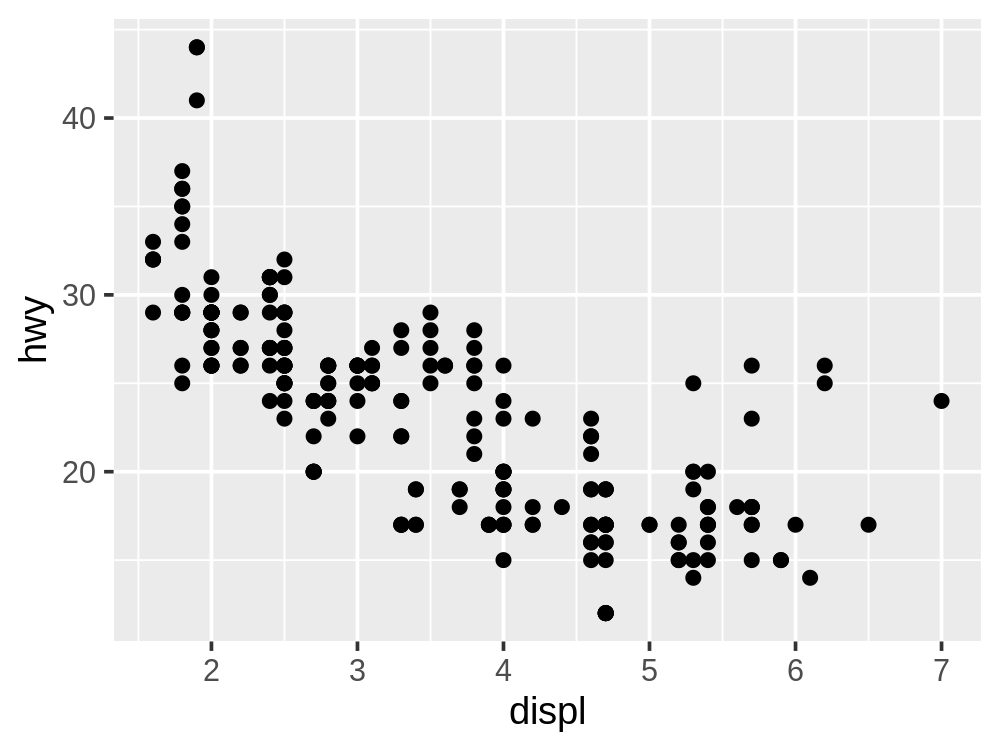

In [2]:
p = ggplot(mpg, aes(x = displ, y = hwy))

p = p + geom_point()

p

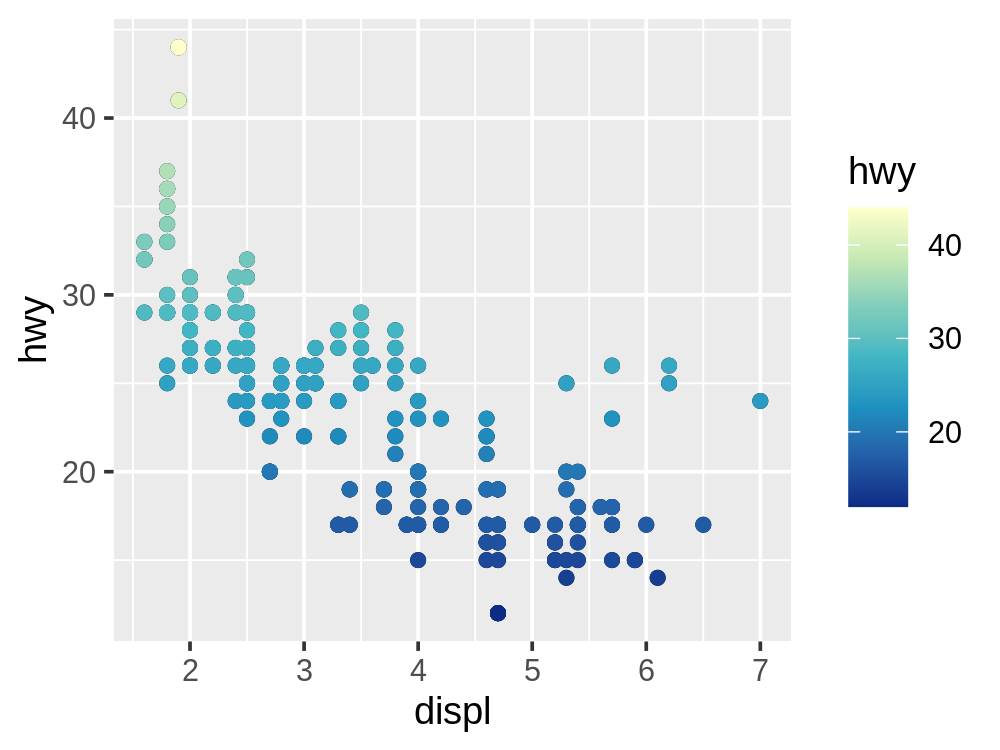

In [3]:
p + geom_point(aes(color = hwy)) + scale_color_distiller(palette = 'YlGnBu')

Why not `scale_color_brewer`?

Custom color palette...

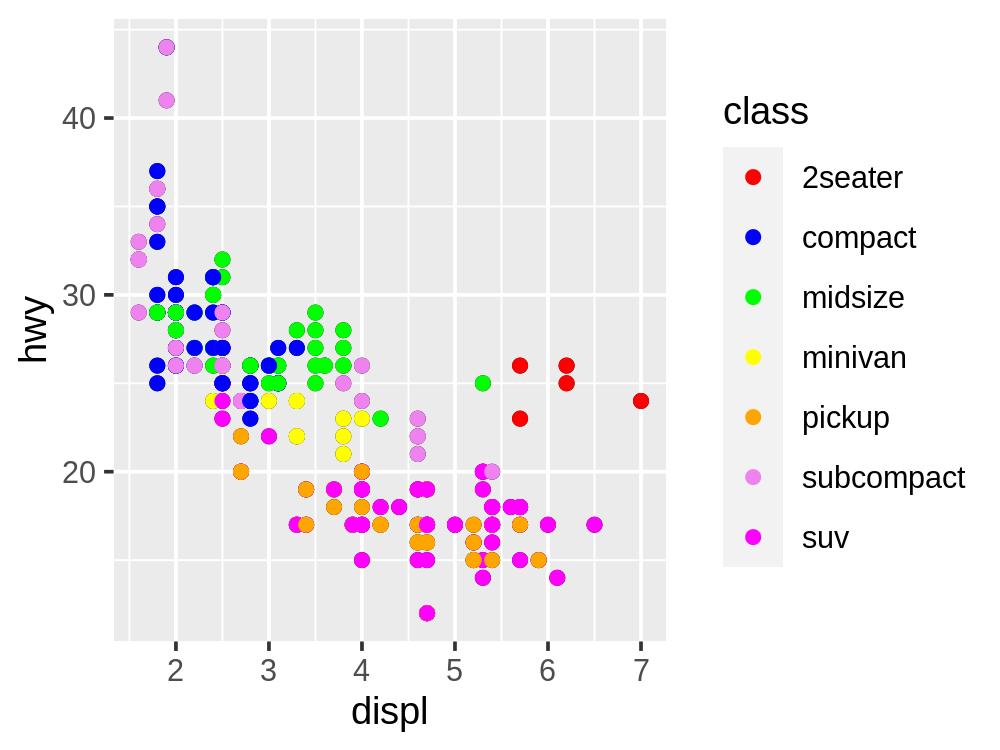

In [4]:
colors = c('red', 'blue', 'green', 'yellow', 'orange', 'violet', 'magenta')

p + geom_point(aes(color = class)) + scale_color_manual(values = colors)

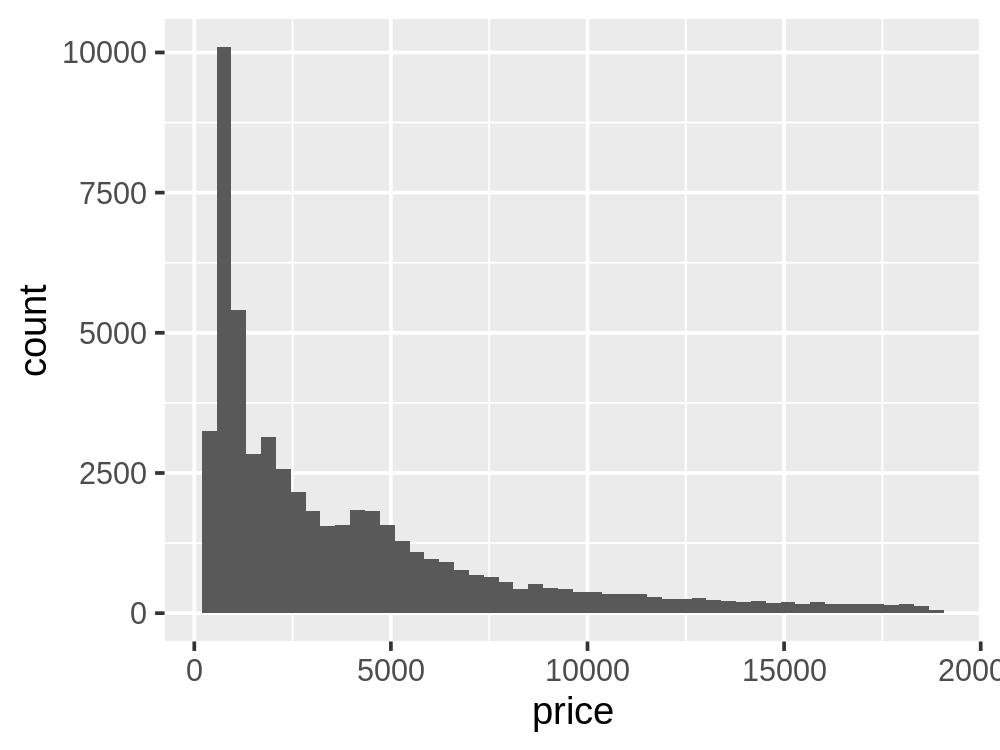

In [5]:
p = ggplot(diamonds, aes(x = price)) + 
    geom_histogram(bins = 50)

p

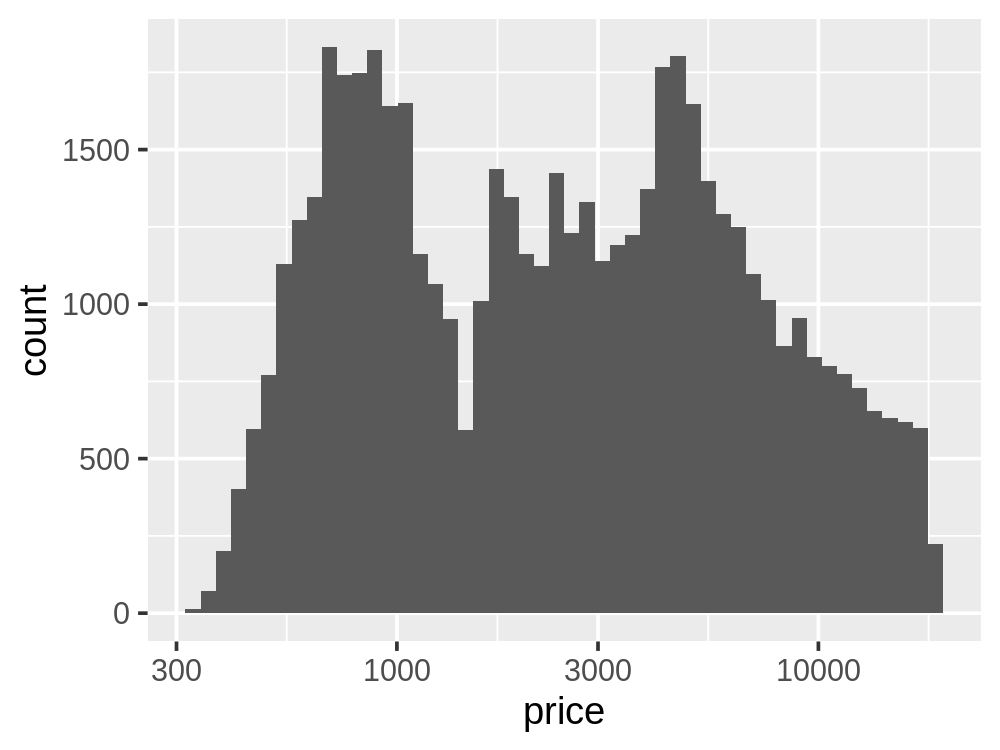

In [6]:
p + scale_x_log10()

### Formatting tick labels

In [7]:
library('scales')


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




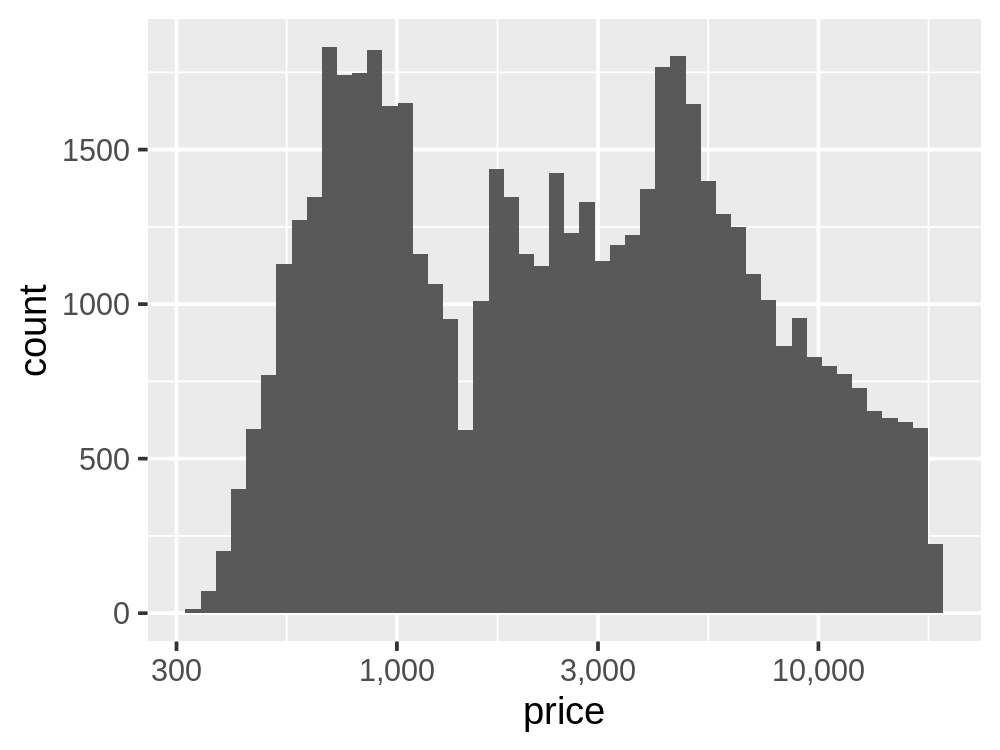

In [8]:
p + scale_x_log10(labels = comma)

`scales::` to use functions without "importing"

[Docs for number format options](https://scales.r-lib.org/reference/number_format.html)

## Theme

In [9]:
# theme_

- `theme_bw()` (e.g.)
- `theme()`

[https://ggplot2.tidyverse.org/reference/theme.html](https://ggplot2.tidyverse.org/reference/theme.html)

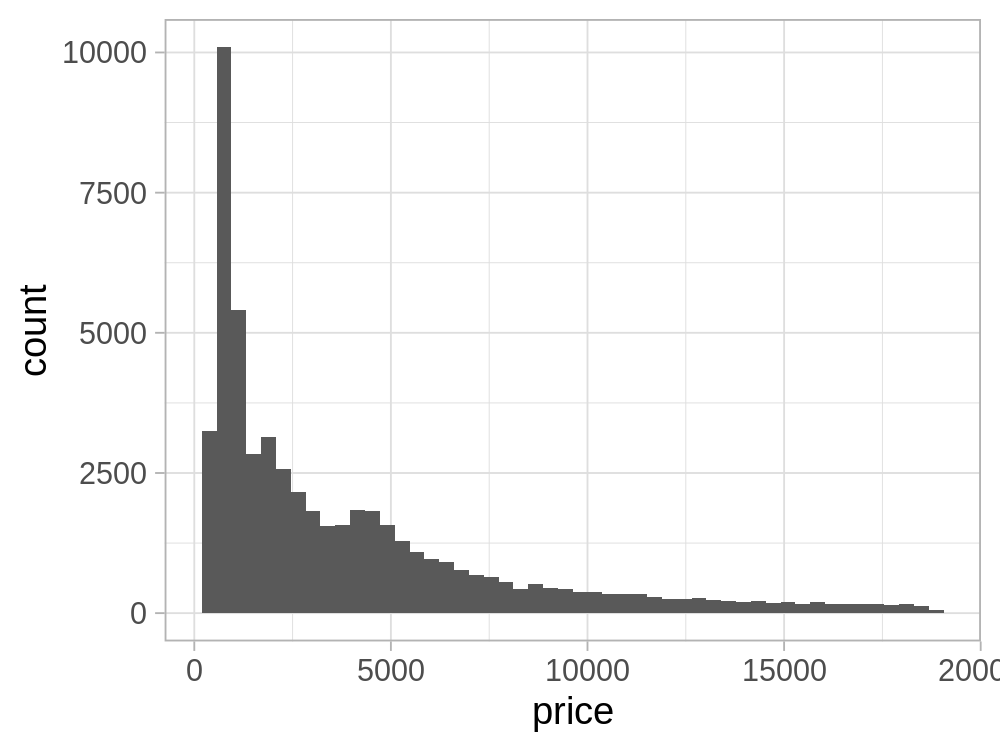

In [10]:
p = p + theme_light()

p

### Legend position

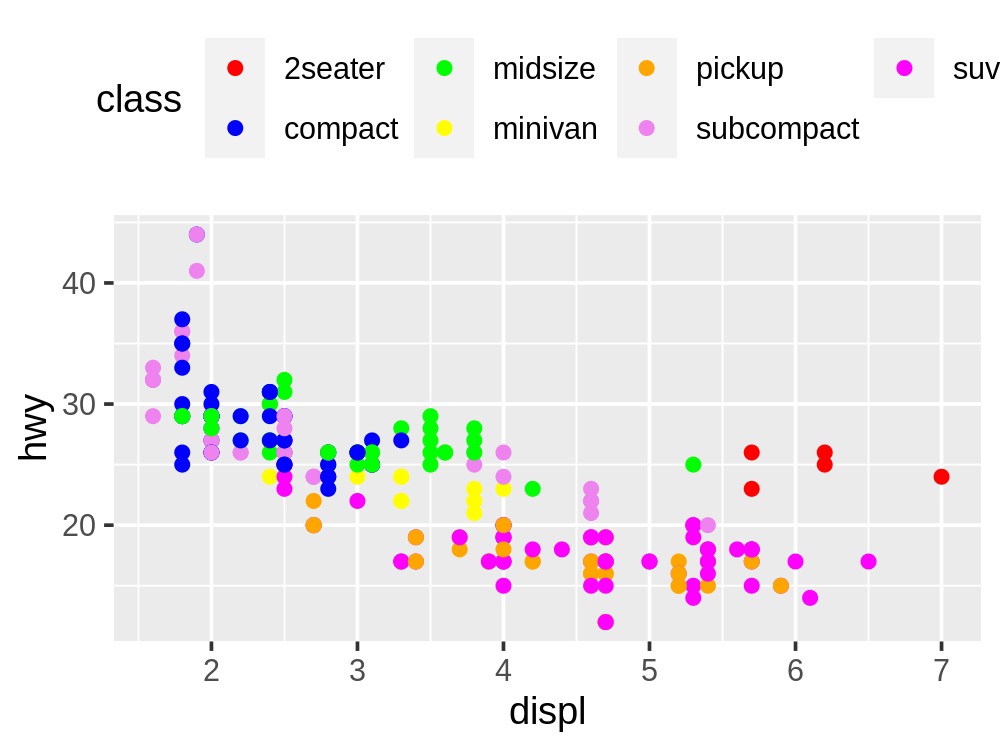

In [11]:
colors = c('red', 'blue', 'green', 'yellow', 'orange', 'violet', 'magenta')

p = ggplot(mpg, aes(x = displ, y = hwy)) + 
    geom_point(aes(color = class)) + scale_color_manual(values = colors) +
    theme(legend.position = 'top')

p

### Axis text font/orientation

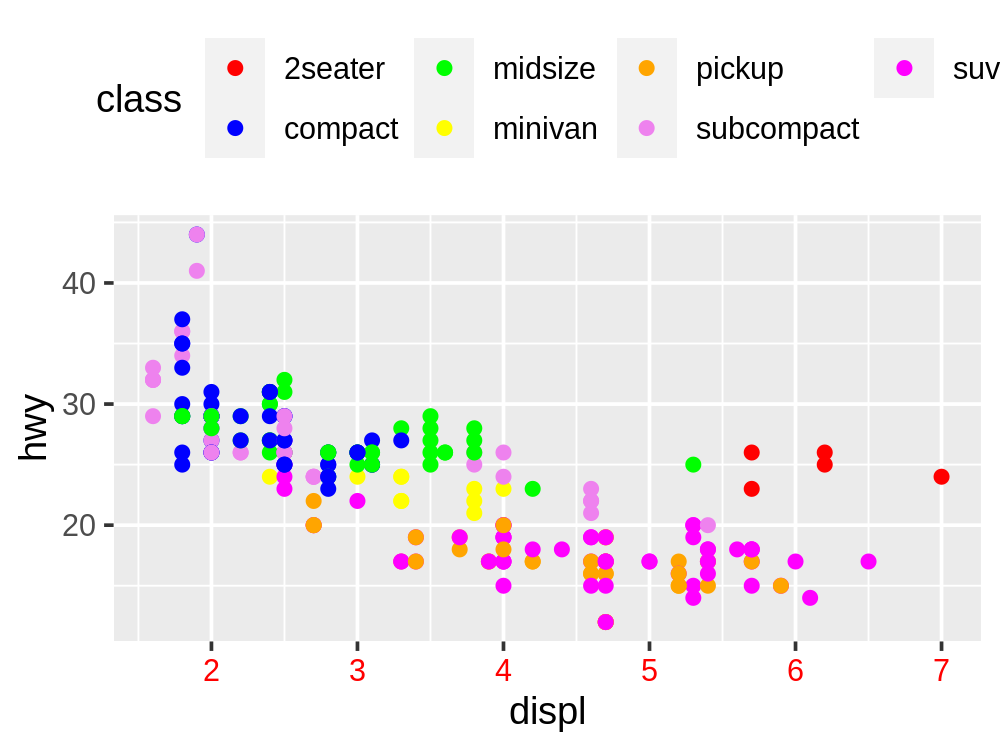

In [12]:
p + theme(axis.text.x = element_text(colour = 'red'))

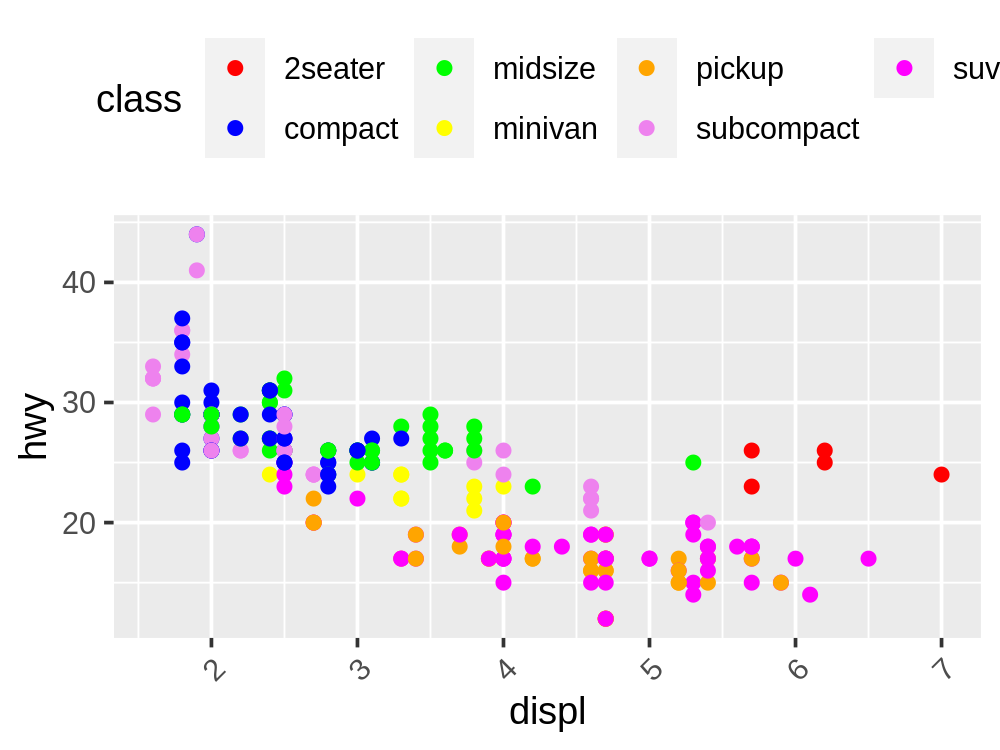

In [13]:
p + theme(axis.text.x = element_text(angle = 45, hjust = 1)) # what about the y-axis? All axis text?

## labelling points

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



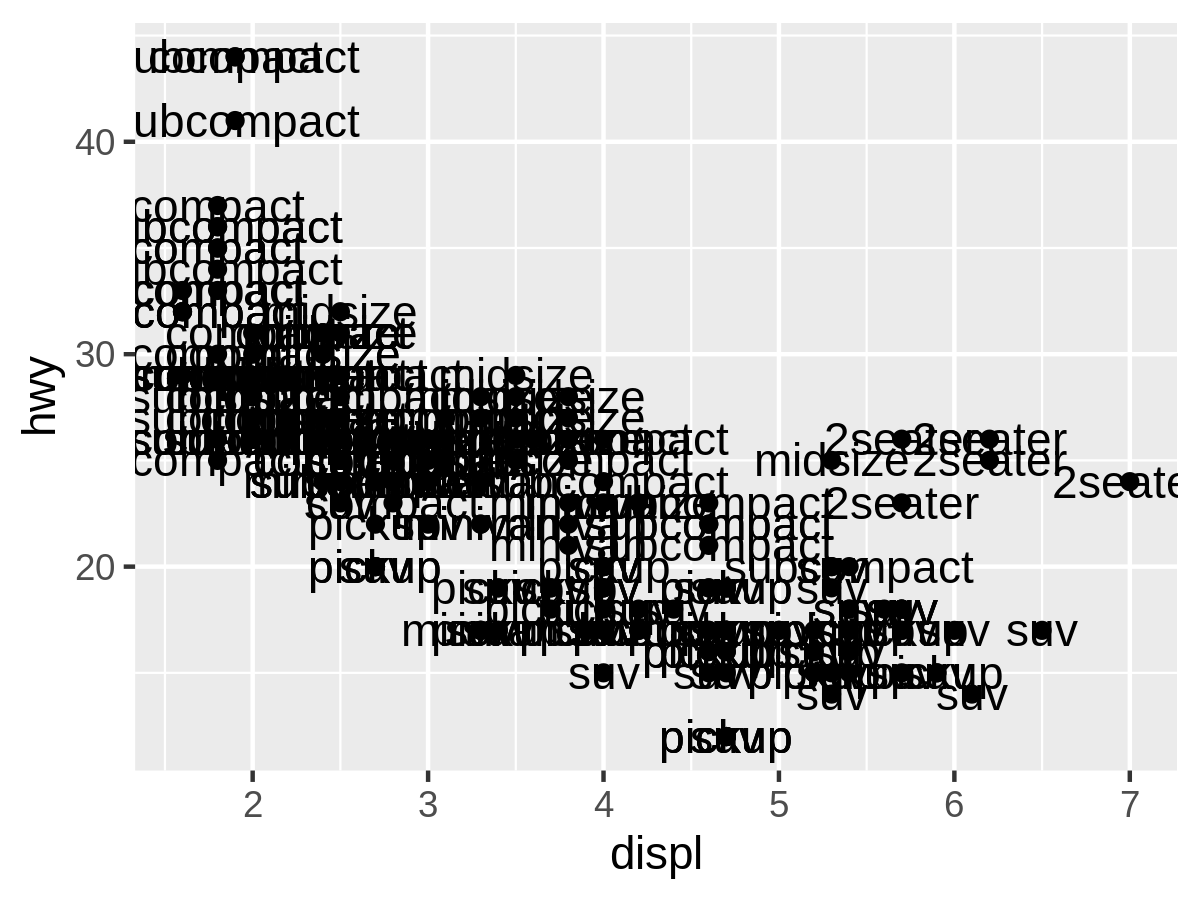

In [2]:
options(repr.plot.res = 300, repr.plot.height = 3, repr.plot.width = 4)

p = ggplot(mpg, aes(x = displ, y = hwy, label = class)) 

p = p + geom_point() + geom_text()

p

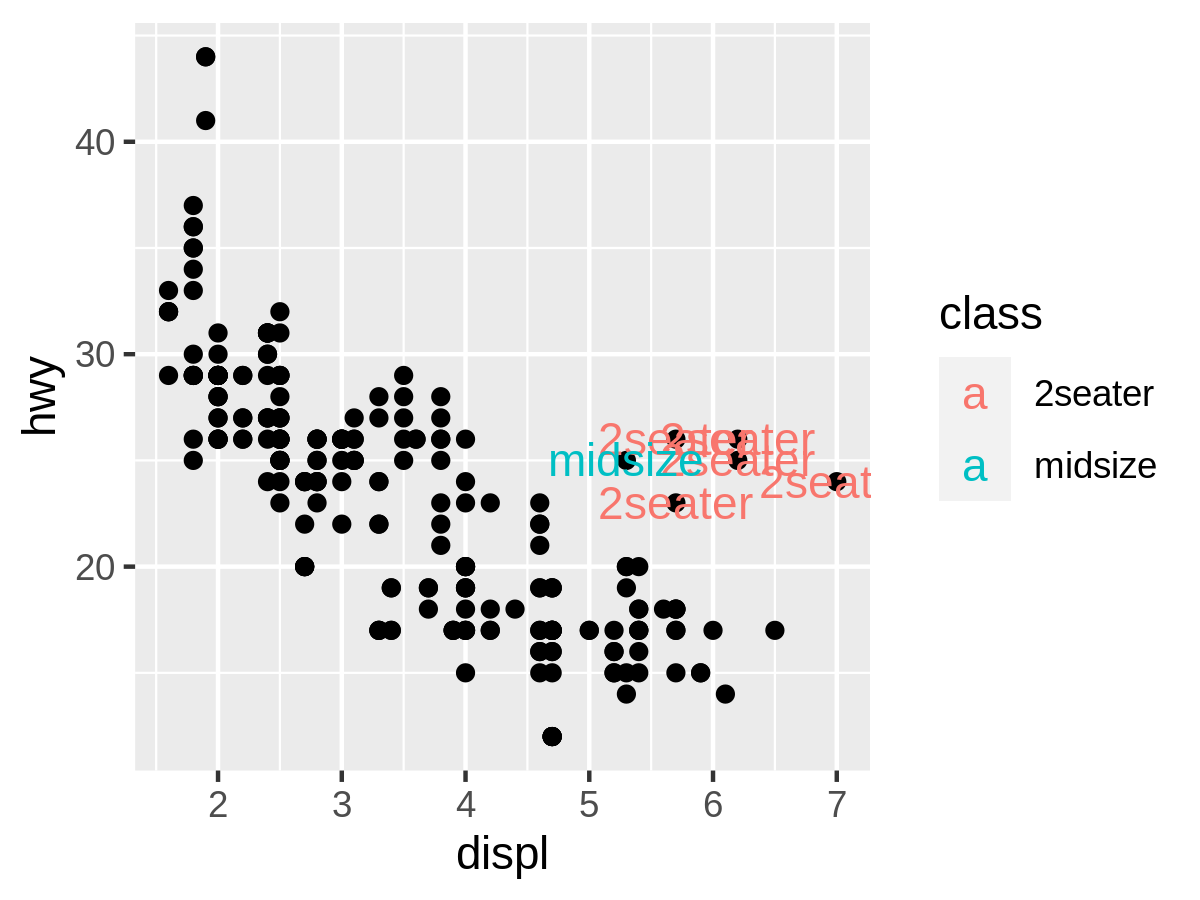

In [4]:
options(repr.plot.res = 300, repr.plot.height = 3, repr.plot.width = 4)

p = ggplot(mpg, aes(x = displ, y = hwy, label = class)) +

    geom_point() + 
    geom_text(data = mpg %>% filter(displ > 5, hwy > 21), mapping = aes (color = class))
#You can use the geom-text to label within chart and filter as necessary.
p

In [16]:
# ?geom_text

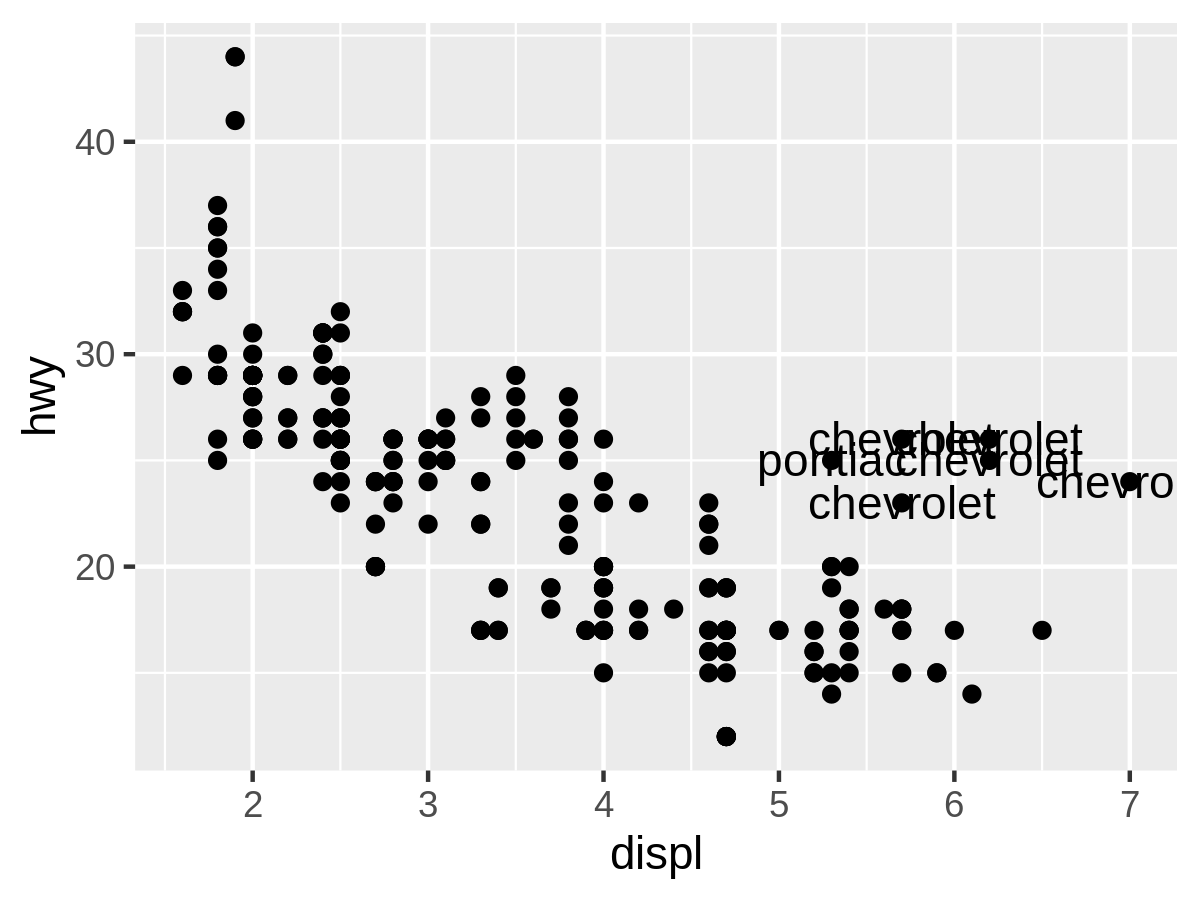

In [17]:
p + geom_text(data = mpg %>% filter(displ > 5, hwy > 21), 
              aes(label = manufacturer))

In [5]:
library('ggrepel')

[GGRepel](https://github.com/slowkow/ggrepel)

In [6]:
filtered.data = mpg %>% filter(displ > 5, hwy > 21)

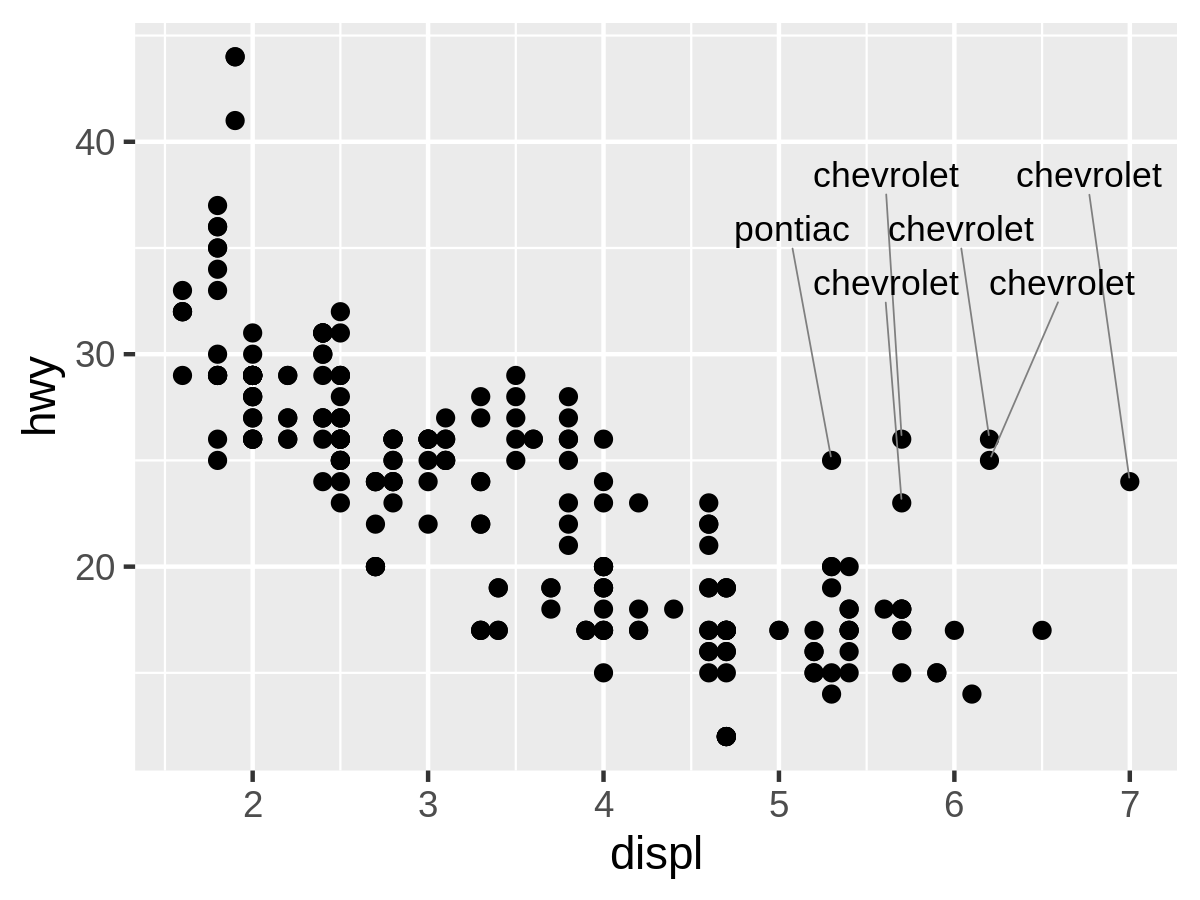

In [11]:
options(repr.plot.res = 300, repr.plot.height = 3, repr.plot.width = 4)

p = ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point() + 
    geom_text_repel(
        data = filtered.data,
        nudge_y = 36 - filtered.data$hwy,
        segment.size = 0.2,
        size = 3,
        segment.color = "grey50",
        aes(label = manufacturer)
    )
p

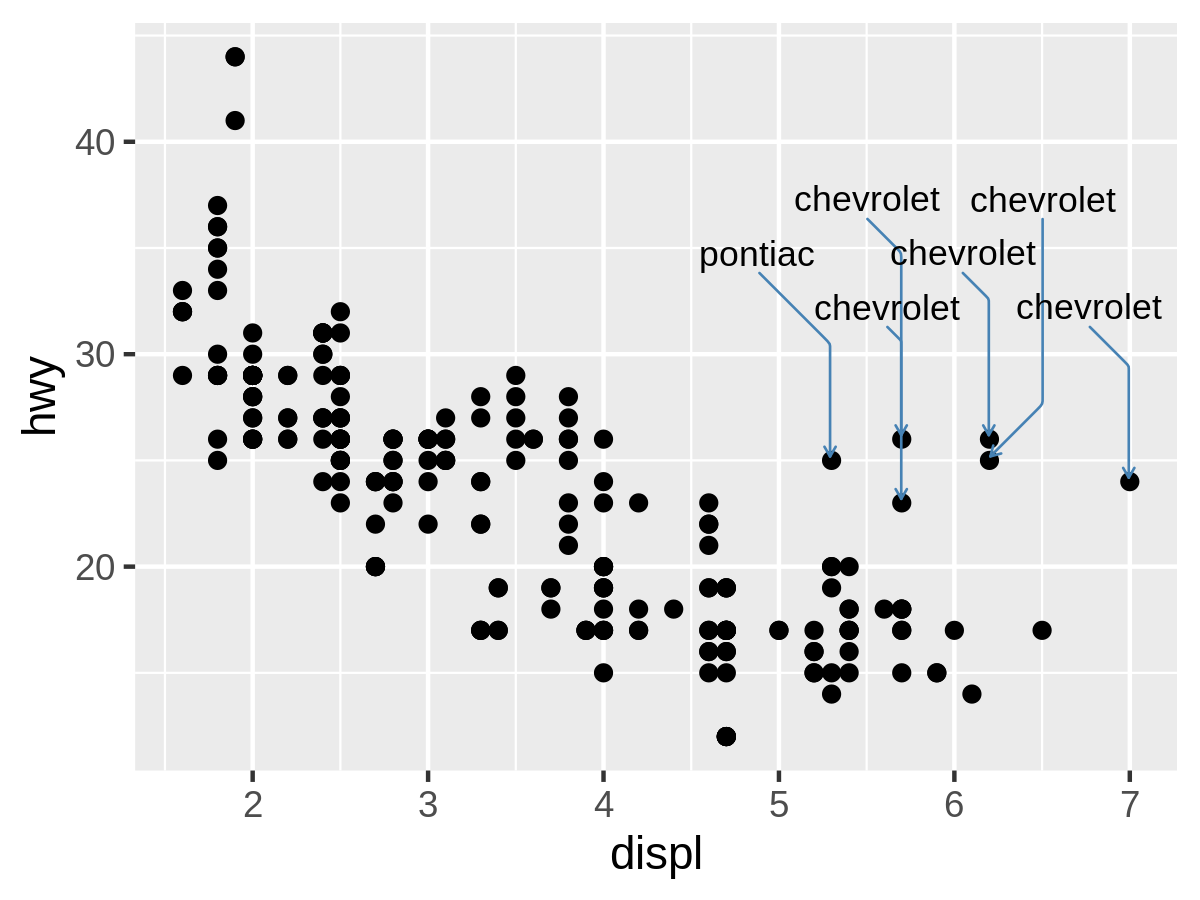

In [12]:
options(repr.plot.res = 300, repr.plot.height = 3, repr.plot.width = 4)

p = ggplot(mpg, aes(x = displ, y = hwy)) + 
    geom_point() + 
    geom_text_repel(
        data = filtered.data,
        segment.size = 0.3,
        size = 3,
        nudge_y = 10,
        segment.curvature = -1e-20,
        arrow = arrow(length = unit(0.015, "npc")),
        segment.color = "steelblue",
        aes(label = manufacturer)
    )

p

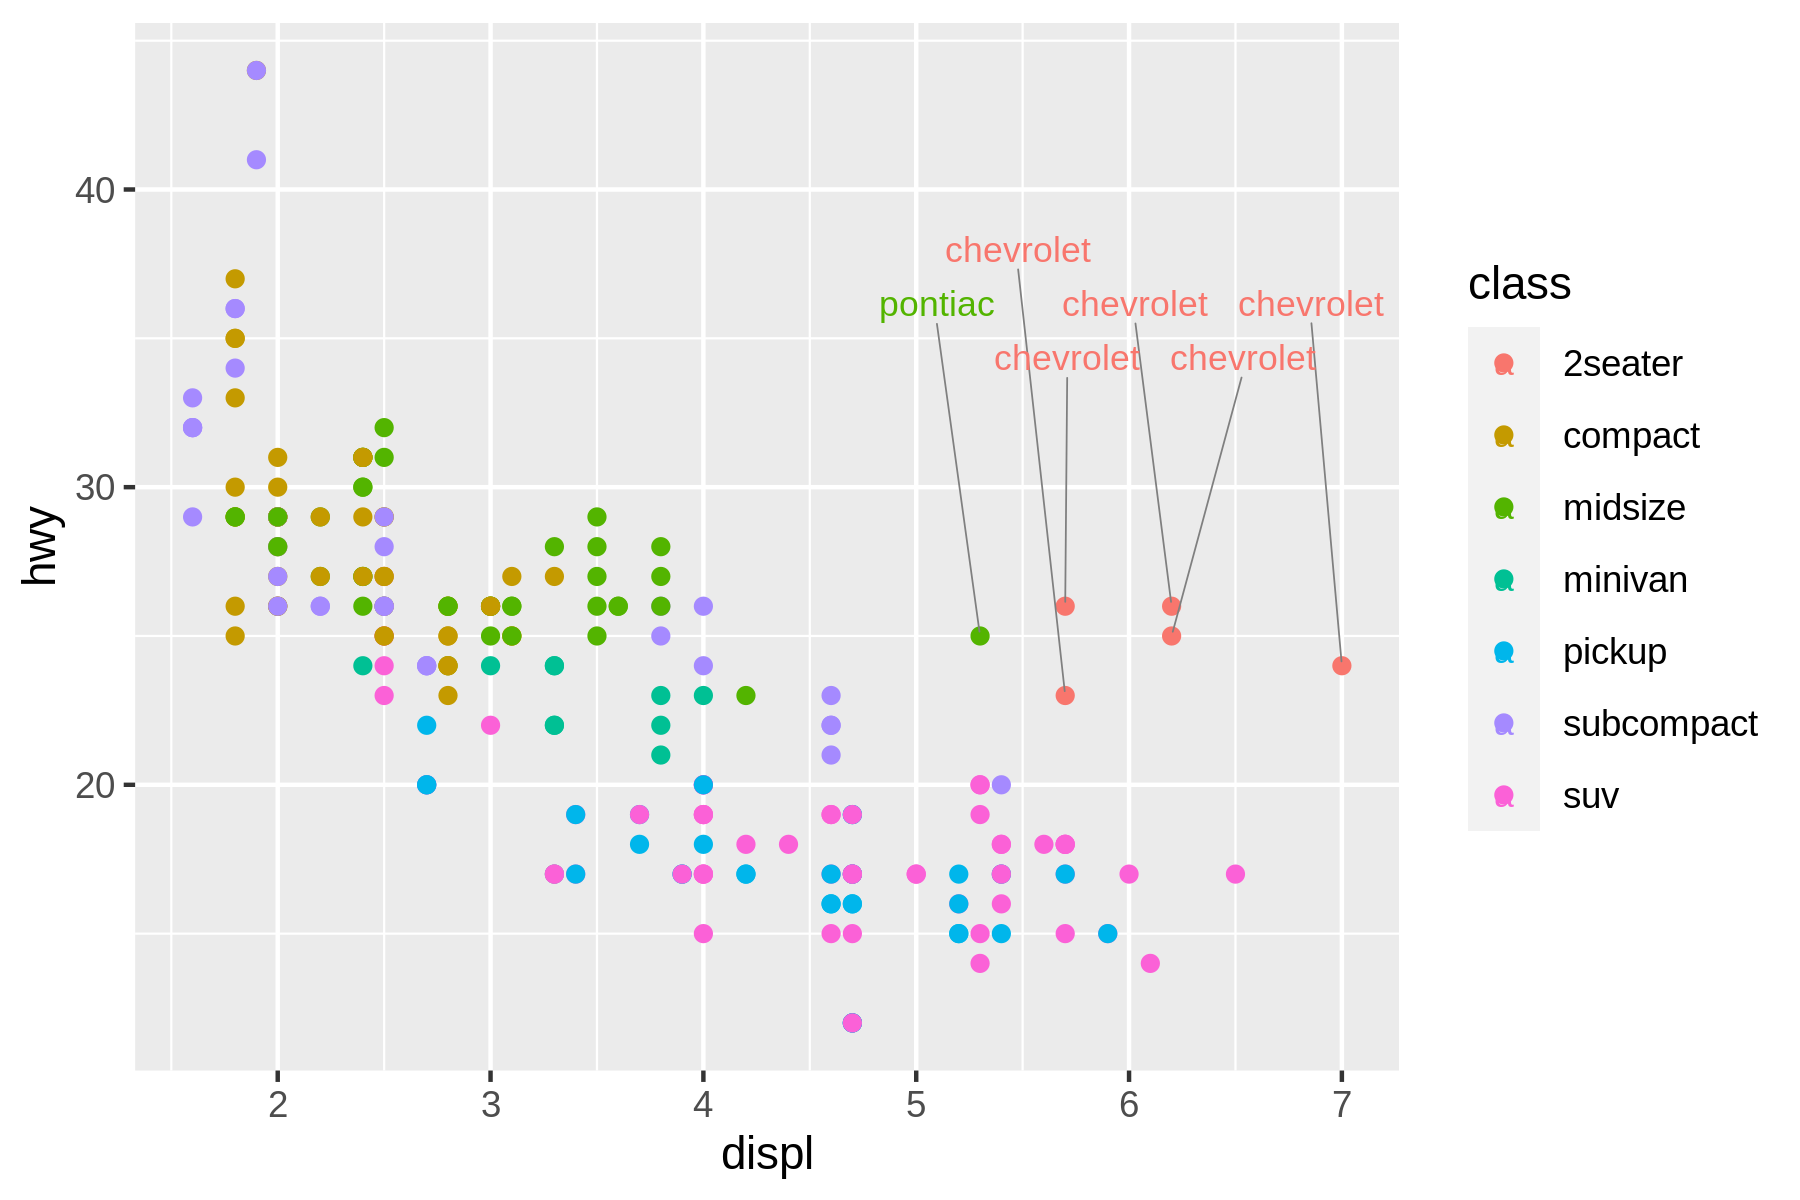

In [13]:
options(repr.plot.res = 300, repr.plot.height = 4, repr.plot.width = 6)

p = ggplot(mpg, aes(x = displ, y = hwy, color = class))

p = p + geom_point()

p = p + geom_text_repel(
            data = filtered.data,
            nudge_y = 36 - filtered.data$hwy,
            segment.size = 0.2,
            size = 3,
            segment.color = "grey50",
            aes(label = manufacturer),
        )

p

## Labs

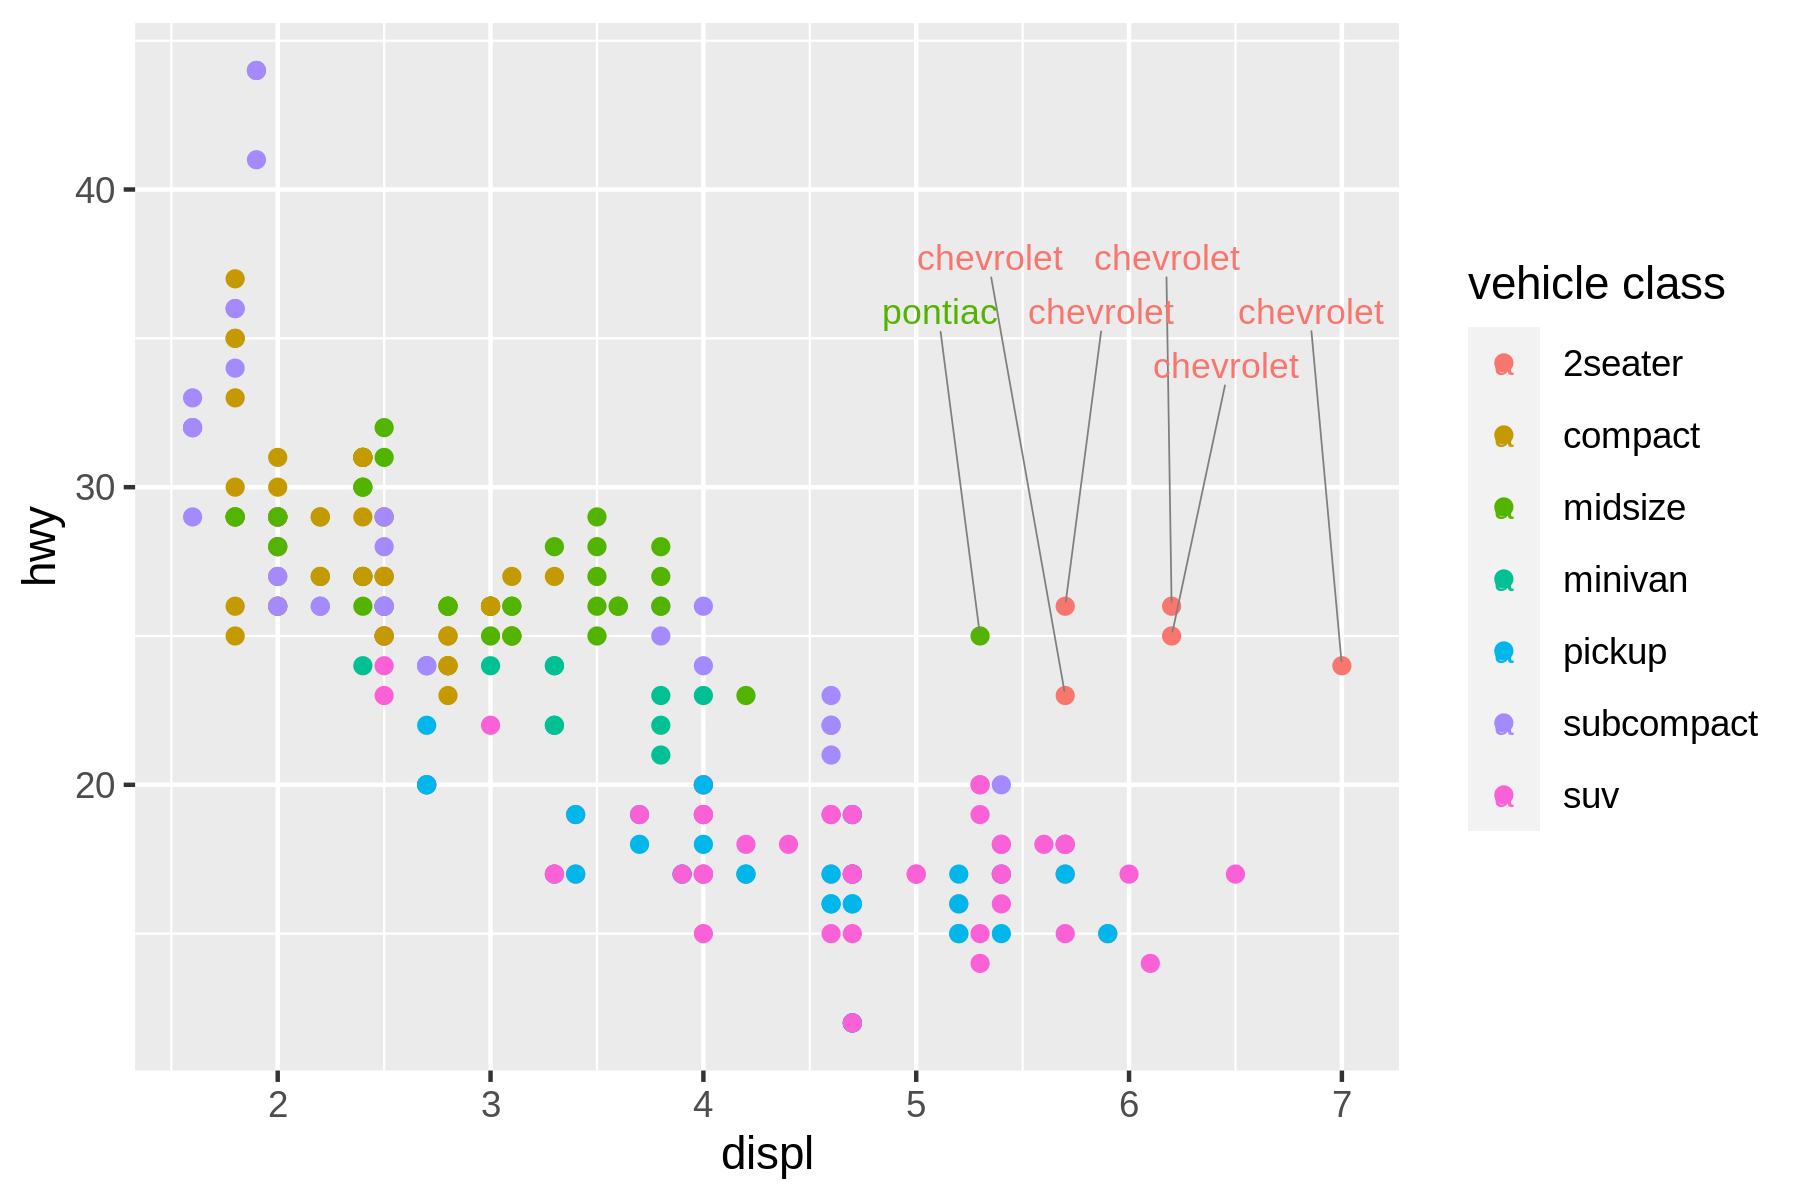

In [14]:
p = p + labs(color = 'vehicle class')

p

How would you change the x-axis label?

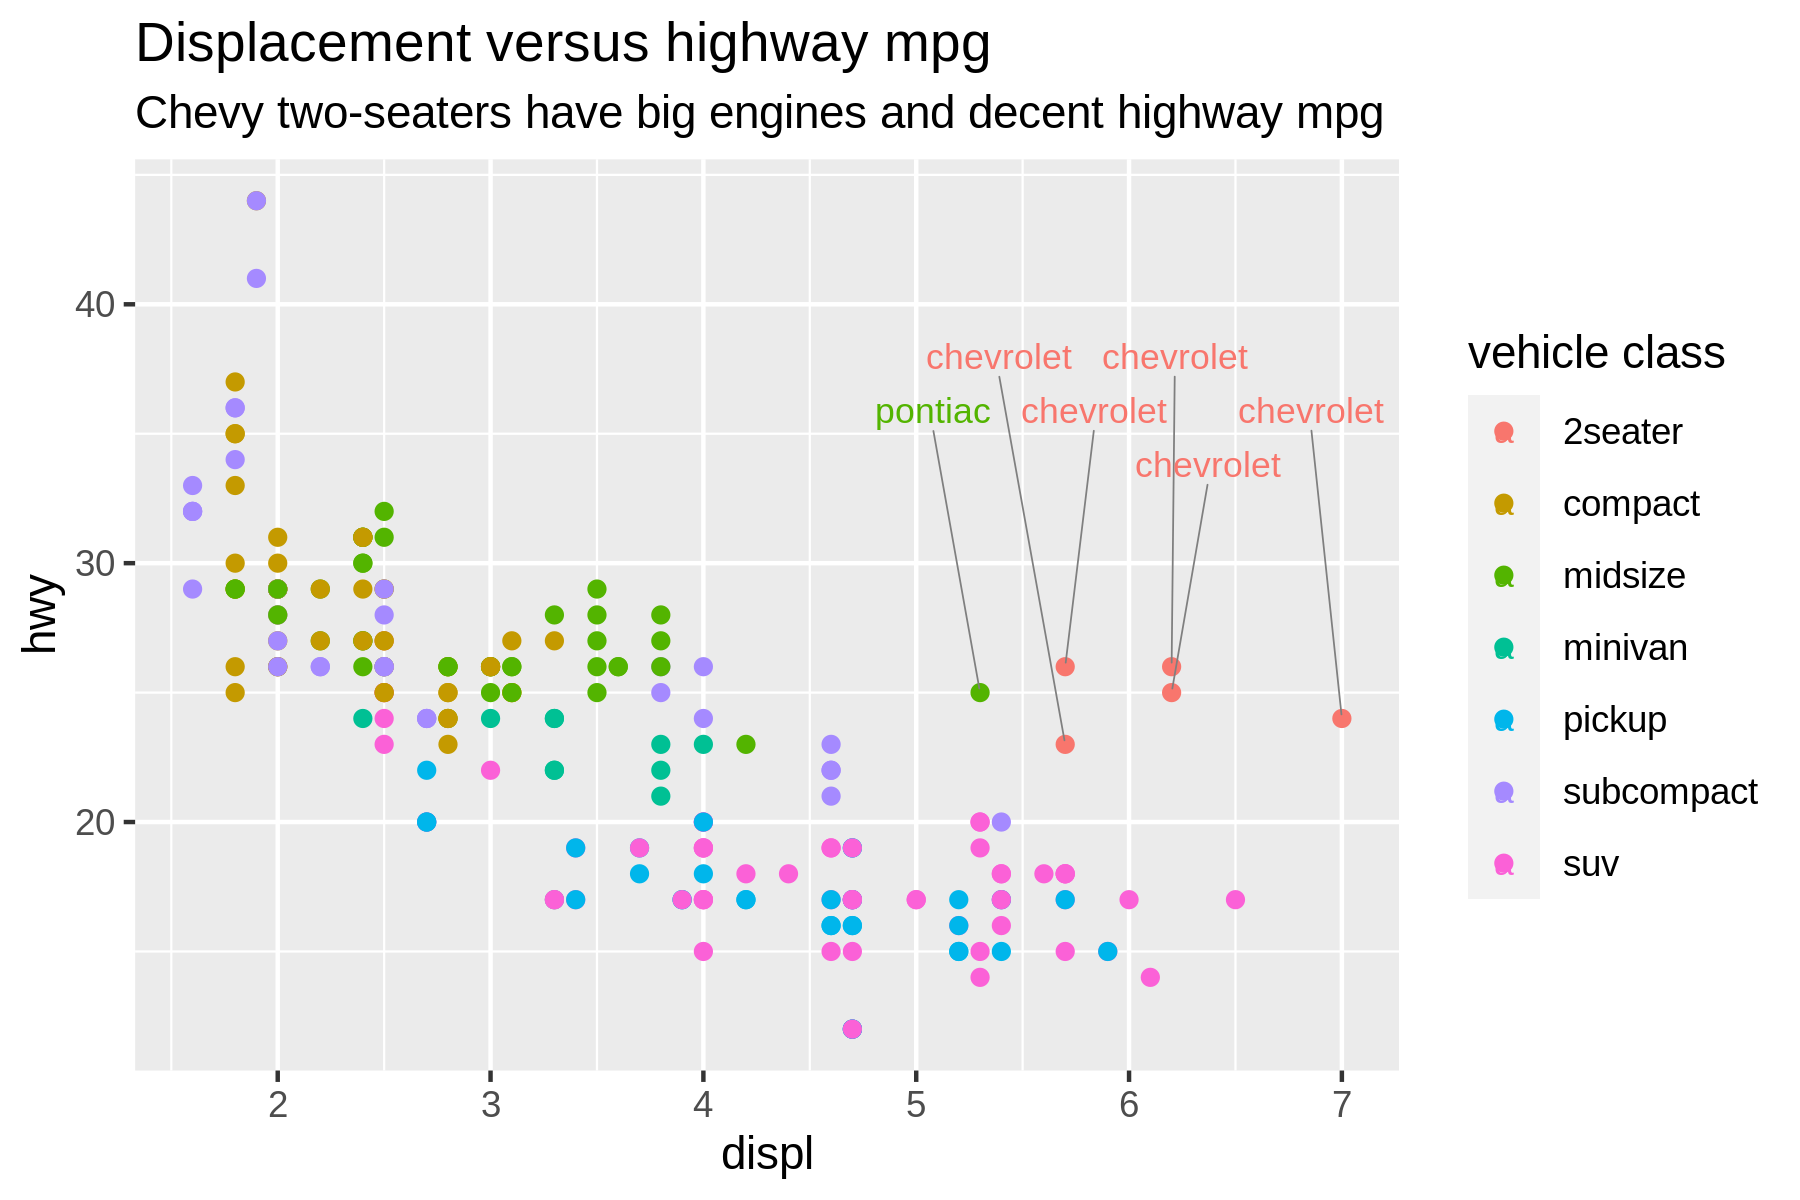

In [15]:
# Chart title/subtitle

p = p + labs(title = 'Displacement versus highway mpg', 
             subtitle = 'Chevy two-seaters have big engines and decent highway mpg')
 
p

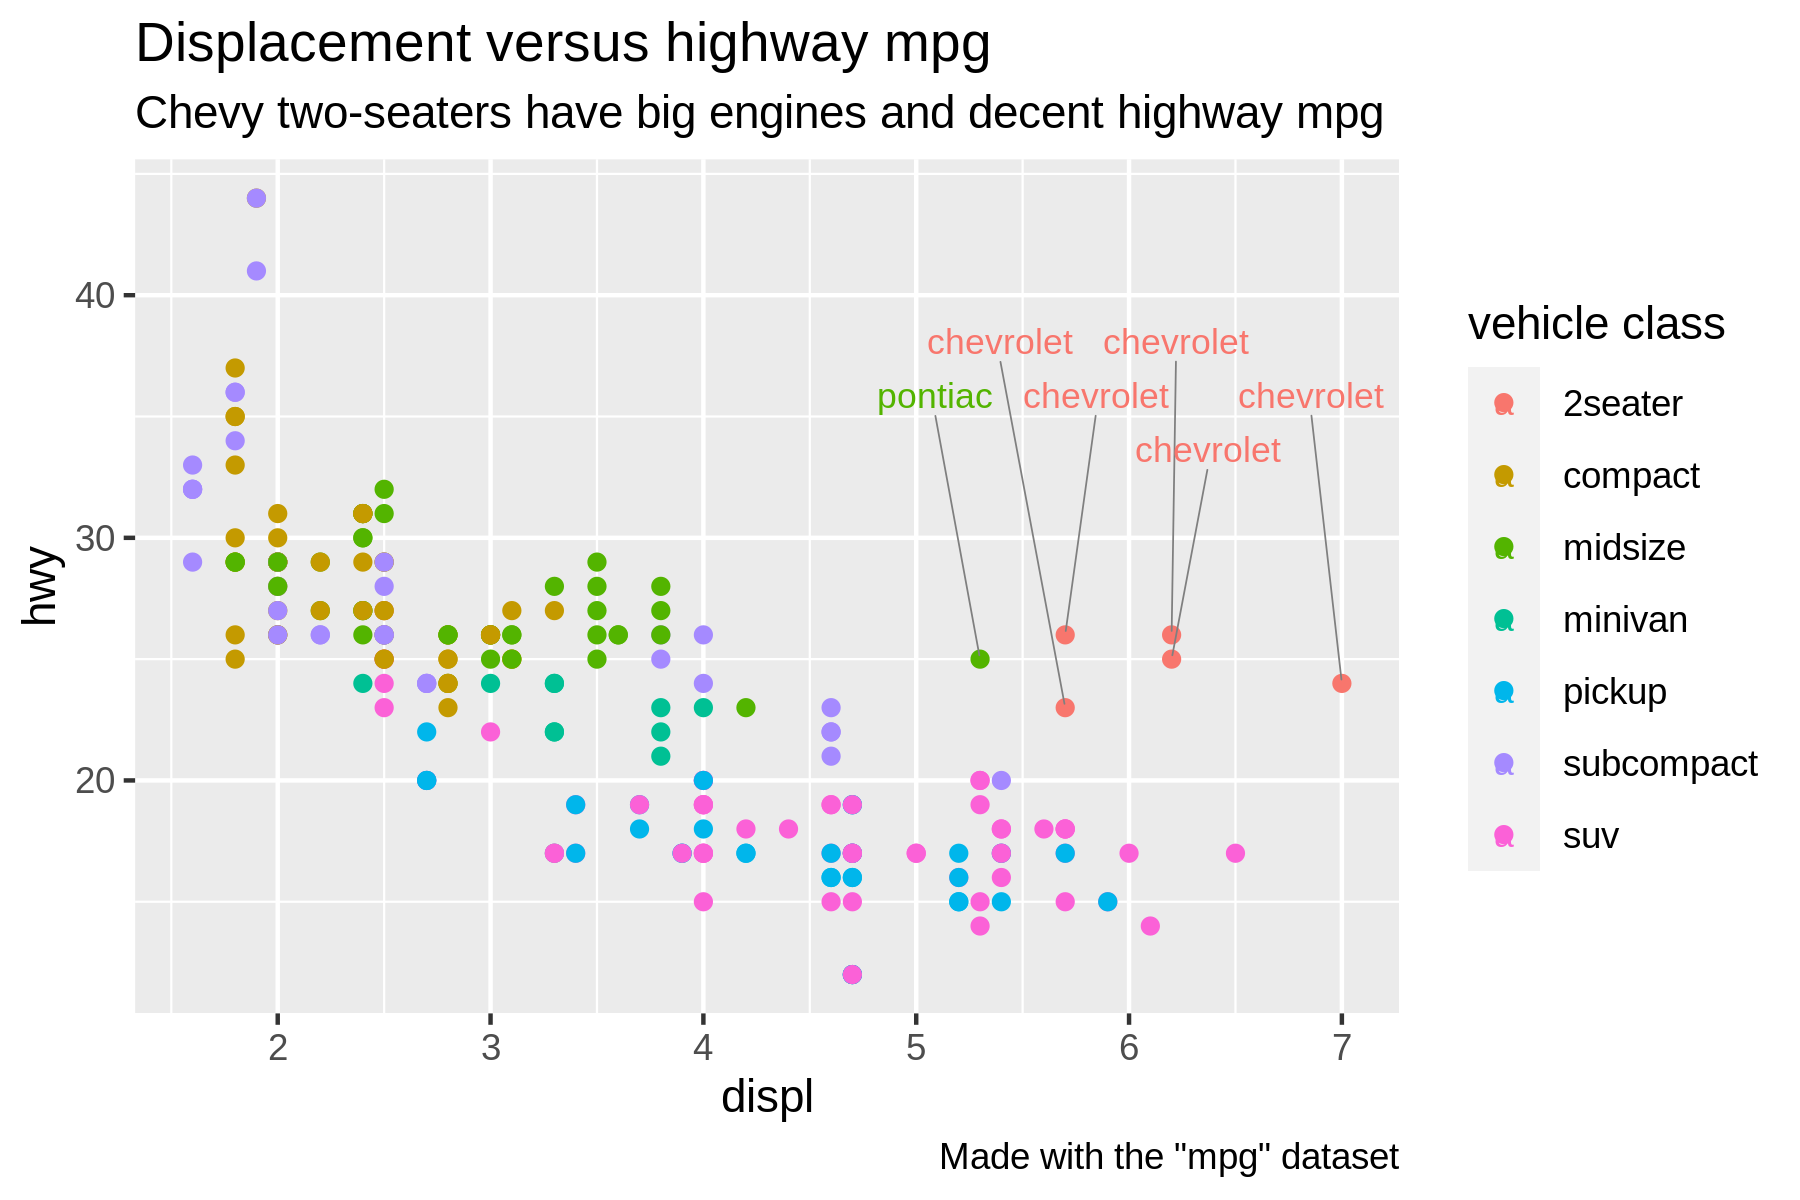

In [16]:
p = p + labs(caption = 'Made with the "mpg" dataset')

p